In [64]:
import pandas as pd
import numpy as np

In [65]:
top_vacc_states = pd.read_csv("C://Users//Lekshmi//Documents//Covid_19_Analysis//top_vacc_states.csv")
case_breaks = pd.read_csv("C://Users//Lekshmi//Documents//Covid_19_Analysis//case_breakdown.csv")
case_vacc = pd.read_csv("C://Users//Lekshmi//Documents//Covid_19_Analysis//case_vacc.csv")

In [66]:
top_vacc_states.shape

(10, 4)

In [67]:
case_breaks.shape

(7, 2)

In [68]:
case_vacc.shape

(15, 6)

In [69]:
top_vacc_states.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   State              10 non-null     object 
 1   Total_Vaccination  10 non-null     int64  
 2   Target_Population  10 non-null     int64  
 3   Vacc_Cover_Pct     10 non-null     float64
dtypes: float64(1), int64(2), object(1)
memory usage: 452.0+ bytes


In [70]:
case_breaks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Dose_Category  7 non-null      object
 1   Total_Doses    7 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 244.0+ bytes


In [71]:
case_vacc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   State/UTs                15 non-null     object 
 1   Total Cases              15 non-null     int64  
 2   Deaths                   15 non-null     int64  
 3   Death Ratio              15 non-null     float64
 4   Total Vaccination Doses  15 non-null     int64  
 5   Vacc_Pct                 15 non-null     float64
dtypes: float64(2), int64(3), object(1)
memory usage: 852.0+ bytes


In [72]:
top_vacc_states["Total_Vaccination"] = pd.to_numeric(top_vacc_states["Total_Vaccination"])
top_vacc_states["Target_Population"] = pd.to_numeric(top_vacc_states["Target_Population"])
top_vacc_states["Vacc_Cover_Pct"] = pd.to_numeric(top_vacc_states["Vacc_Cover_Pct"])

case_breaks["Total_Doses"] = pd.to_numeric(case_breaks["Total_Doses"])

case_vacc["Total Cases"] = pd.to_numeric(case_vacc["Total Cases"])
case_vacc["Deaths"] = pd.to_numeric(case_vacc["Deaths"])
case_vacc["Death Ratio"] = pd.to_numeric(case_vacc["Death Ratio"])
case_vacc["Total Vaccination Doses"] = pd.to_numeric(case_vacc["Total Vaccination Doses"])
case_vacc["Vacc_Pct"] = pd.to_numeric(case_vacc["Vacc_Pct"])

In [73]:
print("top 3 coverage states")
print(top_vacc_states[["State","Vacc_Cover_Pct"]].head(3))

top 3 coverage states
                 State  Vacc_Cover_Pct
0  Andaman And Nicobar          248.44
1          Lakshadweep          220.17
2               Sikkim          206.75


In [74]:
print("top 3 dose categories")
print(case_breaks.head(3))

top 3 dose categories
      Dose_Category  Total_Doses
0      Dose 1 (All)    920123873
1      Dose 2 (All)    864204849
2  Boosters (18-59)    158578250


In [75]:
print("sickest states vs vaccins")
print(case_vacc[["State/UTs","Total Cases","Vacc_Pct"]].head(3))

sickest states vs vaccins
     State/UTs  Total Cases  Vacc_Pct
0  Maharashtra      8171048    142.49
1       Kerala      6907241    165.74
2    Karnataka      4088769    175.51


In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

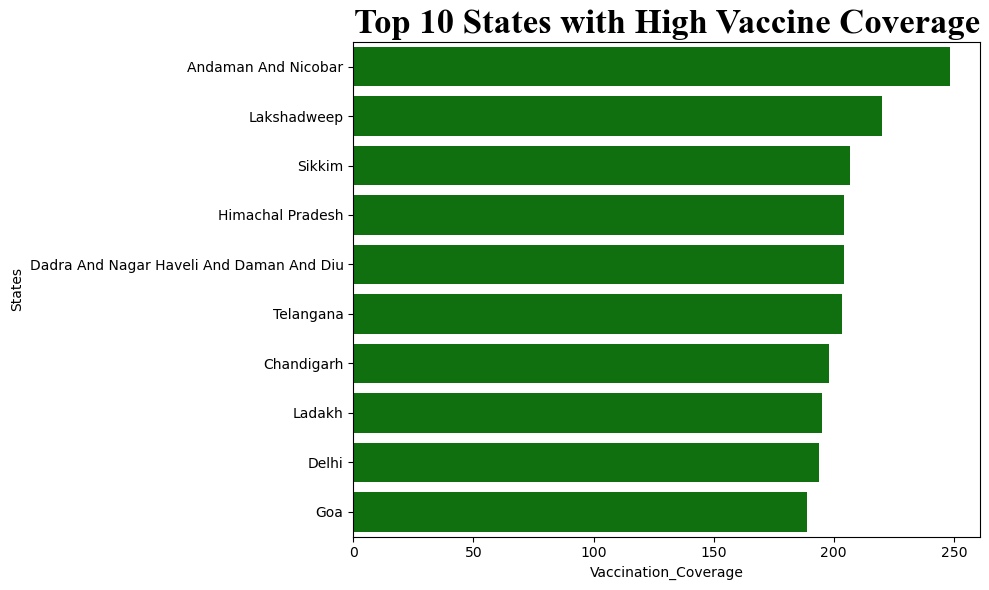

In [77]:
# top state coverage plot

plt.figure(figsize=(10,6))
sns.barplot(data=top_vacc_states,y="State",x="Vacc_Cover_Pct",color="green")
plt.ylabel("States")
plt.xlabel("Vaccination_Coverage")
plt.title("Top 10 States with High Vaccine Coverage",fontweight="bold",fontsize=25,family="Times New Roman")
plt.tight_layout()
plt.savefig("Top_Coverage",dpi=300,bbox_inches="tight")
plt.show()

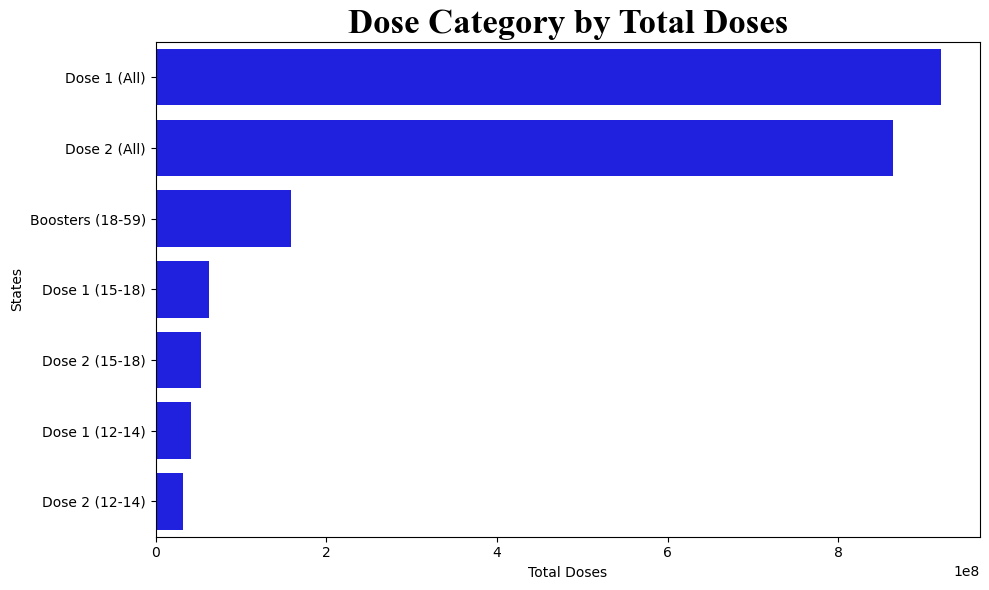

In [78]:
# dose category vs total doses

plt.figure(figsize=(10,6))
sns.barplot(data=case_breaks,x="Total_Doses",y="Dose_Category",color="blue")
plt.title("Dose Category by Total Doses",fontsize=25,fontweight="bold",family="Times New Roman")
plt.xlabel("Total Doses")
plt.ylabel("States")
plt.tight_layout()
plt.savefig("Top_Dose_Category",dpi=300,bbox_inches="tight")
plt.show()

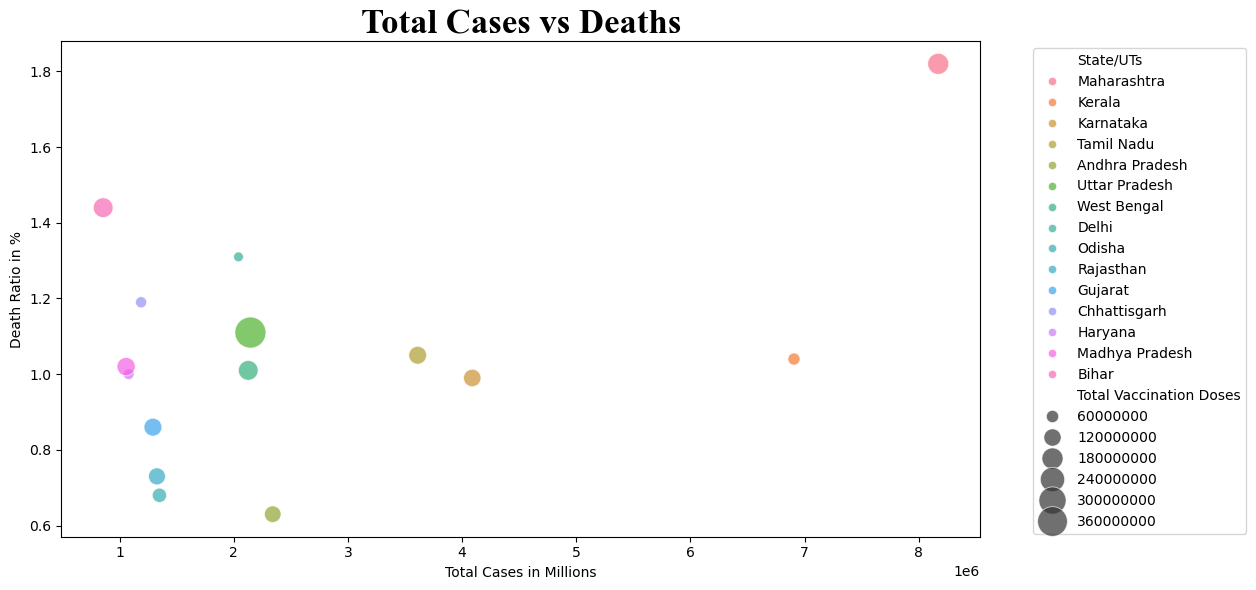

In [79]:
# vaccines vs death ratio

plt.figure(figsize=(10,6))
sns.scatterplot(data=case_vacc,x="Total Cases",y="Death Ratio",size="Total Vaccination Doses",hue="State/UTs",sizes=(50,500),alpha=0.7)
plt.title("Total Cases vs Deaths",fontsize=25,fontweight="bold",family="Times New Roman")
plt.xlabel("Total Cases in Millions")
plt.ylabel("Death Ratio in %")
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05,1))
plt.savefig("Death_Vaccine",bbox_inches="tight",dpi=300)
plt.show()